In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from IPython.core.display import HTML

# Example 1

In [2]:
x, y = make_classification(n_samples=1000, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           random_state=4)

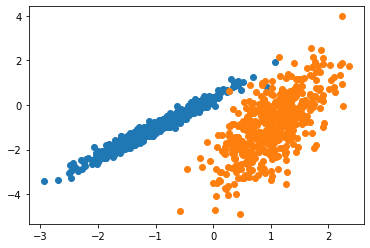

In [3]:
for c in range(2):
    idx = np.where(y == c)[0]
    plt.scatter(x[idx, 0], x[idx, 1])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:243: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:449: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn("This model does not have any cluster centers "


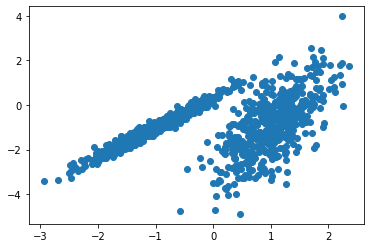

In [4]:
from sklearn.cluster import AffinityPropagation

model = AffinityPropagation(damping=0.5, random_state=None)

model.fit(x)
yhat = model.predict(x)
clusters = np.unique(yhat)
for cluster in clusters:
    idx = np.where(yhat == cluster)[0]
    plt.scatter(x[idx, 0], x[idx, 1])
plt.show()

HTML('<div class="alert alert-block alert-danger">This cluster is not good since it has more clusters than needed</div>')

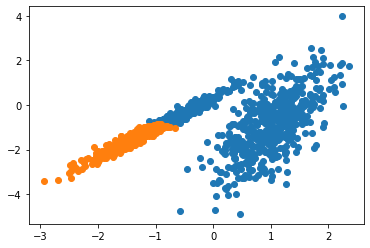

In [5]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2)
yhat = model.fit_predict(x)
clusters = np.unique(yhat)
for cluster in clusters:
    idx = np.where(yhat == cluster)[0]
    plt.scatter(x[idx, 0], x[idx, 1])
plt.show()

HTML('<div class="alert alert-block alert-danger">Still not good</div>')

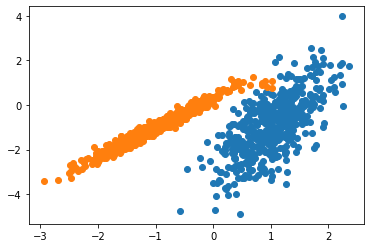

In [6]:
from sklearn.cluster import Birch

model = Birch(threshold=0.01, n_clusters=2)
yhat = model.fit_predict(x)
clusters = np.unique(yhat)
for cluster in clusters:
    idx = np.where(yhat == cluster)[0]
    plt.scatter(x[idx, 0], x[idx, 1])
plt.show()

HTML('<div class="alert alert-block alert-success">Looks good!</div>')

# Example 2

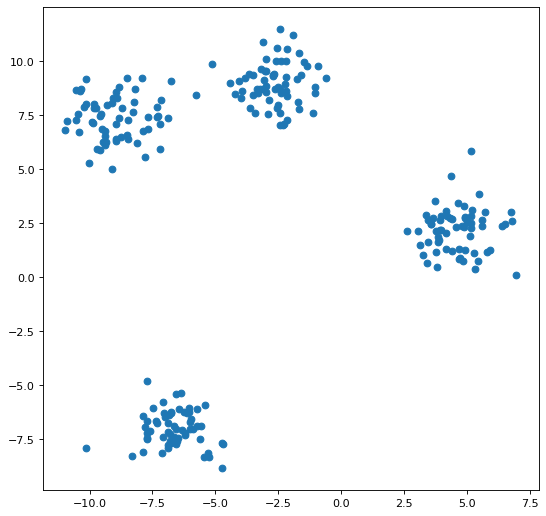

In [8]:
from sklearn.datasets import make_blobs

n_samples = 250
n_features = 2
n_clusters = 4
random_state = 42
max_iter = 100

X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=random_state)

fig=plt.figure(figsize=(8,8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X[:, 0], X[:, 1])

In [9]:
# Shark 
# Keans++
# hcoose initial centroids which are as far apart from each other as possible
def initialize_plus(m, n, X):
    '''
    m: cluster numbers
    n: feature numbers
    '''
    prob = 'hard'
    data = X.copy() # to ensure no same centroids
    C = np.zeros((m, n))
    

    # 1
    idx = np.random.choice(range(len(data)))
    C[0] = data[idx]
    data = np.delete(data, idx, 0)
        
    # m-1
    for i in range(m - 1):
       
        # get the total distance to each centroids
        dist = ((C - data[:, None, :])**2).sum(axis=(1, 2))
        
        # get the probability
        if prob == 'hard':
            p = np.zeros_like(dist)
            p[np.argmax(dist, axis=0)] = 1
        elif prob == 'soft':
            p = dist/np.sum(dist) 
            
        idx = np.random.choice(range(len(data)), p=p)
        C[i+1] = data[idx]
        data = np.delete(data, idx, 0)
        
    return C
        

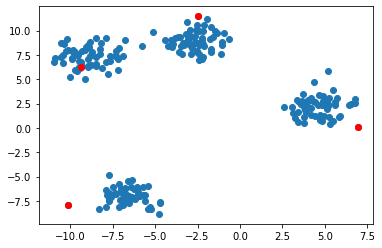

In [13]:
C = initialize_plus(4, 2, X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(C[:,0], C[:,1], color='red')

In [18]:
def plus_plus(ds, k, random_state=42):
    """
    Create cluster centroids using the k-means++ algorithm.
    Parameters
    ----------
    ds : numpy array
        The dataset to be used for centroid initialization.
    k : int
        The desired number of clusters for which centroids are required.
    Returns
    -------
    centroids : numpy array
        Collection of k centroids as a numpy array.
    Inspiration from here: https://stackoverflow.com/questions/5466323/how-could-one-implement-the-k-means-algorithm
    """

    np.random.seed(random_state)
    centroids = [ds[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(ds[i])

    return np.array(centroids)

C = plus_plus(X, n_clusters)

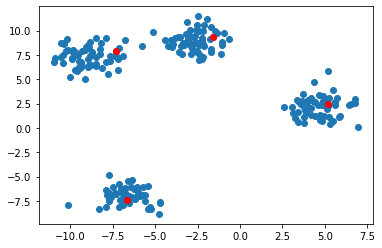

In [19]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(C[:,0], C[:,1], color='red')

# Elbow method

In [22]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris['data'])

In [23]:
distortions = []
K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df)
    distortions.append(model.inertia_)

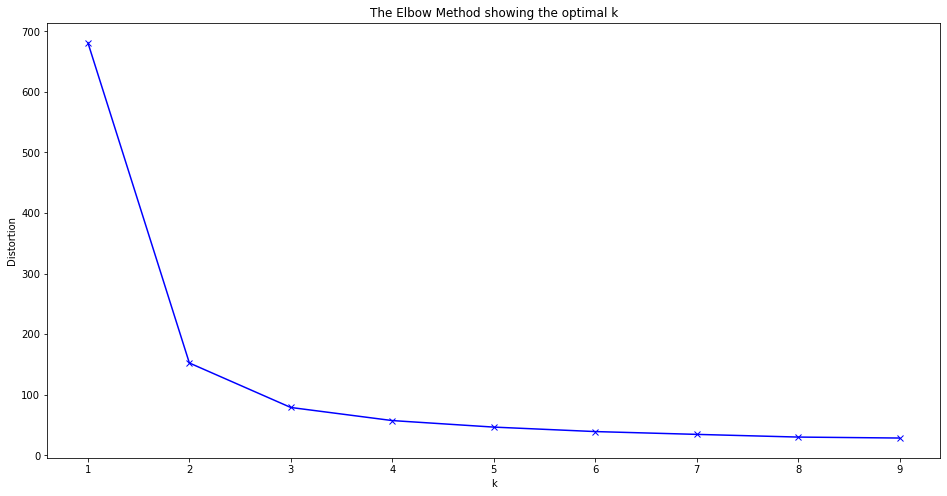

In [24]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()